## 라이브러리 설치

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [0]:
metadata = pd.read_csv("./data/building_metadata.csv")
train = pd.read_csv("./data/train.csv")
weather_train = pd.read_csv("./data/weather_train.csv")

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
metadata = pd.read_csv("/content/gdrive/My Drive/kaggle/data/building_metadata.csv")
train = pd.read_csv("/content/gdrive/My Drive/kaggle/data/train.csv")
weather_train = pd.read_csv("/content/gdrive/My Drive/kaggle/data/weather_train.csv")

KeyboardInterrupt: ignored

In [7]:
metadata.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [8]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [9]:
weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


## 데이터 병합

In [11]:
data = pd.merge(train, metadata, on='building_id', how = 'left')
data = pd.merge(data, weather_train, on = ['timestamp', 'site_id'], how = 'left')
data.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


In [0]:
data.to_csv("/content/gdrive/My Drive/kaggle/data/merged_data.csv", index = 'false')

In [0]:
data.to_csv("./data/merged_data.csv", index = 'false')

## 이상치, 결측치 분석

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv("/content/gdrive/My Drive/kaggle/data/merged_data.csv", index_col = 0)
data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


### (0) meter_reading : target variable

In [5]:
# 결측치 확인
data.loc[pd.isna(data['meter_reading']), :]

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed


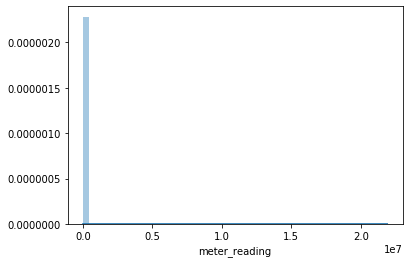

In [12]:
sns.distplot(data.meter_reading, kde=True, rug=False)

In [10]:
data.meter_reading.describe()

count    2.0216100000e+07
mean     2.1171210762e+03
std      1.5323562499e+05
min      0.0000000000e+00
25%      1.8300000000e+01
50%      7.8775000000e+01
75%      2.6798400000e+02
max      2.1904700000e+07
Name: meter_reading, dtype: float64

## EDA

In [32]:
data.cloud_coverage.value_counts()

0.0    5752501
2.0    2431126
4.0    1844497
6.0     548557
8.0     548105
7.0     125319
9.0      74188
1.0      25653
3.0      21866
5.0      18923
Name: cloud_coverage, dtype: int64

In [31]:
data.loc[data.dew_temperature >= data.air_temperature, :].head(30)

,Unnamed: 0,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
4357,4357,1325,3,2016-01-01 01:00:00,328.5480,15,Entertainment/public assembly,155177,1915.0,NaN,-1.0,NaN,-1.0,NaN,NaN,330.0,4.1
4358,4358,1326,0,2016-01-01 01:00:00,90.2000,15,Office,46981,1962.0,NaN,-1.0,NaN,-1.0,NaN,NaN,330.0,4.1
4359,4359,1326,1,2016-01-01 01:00:00,1.9960,15,Office,46981,1962.0,NaN,-1.0,NaN,-1.0,NaN,NaN,330.0,4.1
4360,4360,1326,2,2016-01-01 01:00:00,3511.2400,15,Office,46981,1962.0,NaN,-1.0,NaN,-1.0,NaN,NaN,330.0,4.1
4361,4361,1327,0,2016-01-01 01:00:00,165.4250,15,Education,98125,2011.0,NaN,-1.0,NaN,-1.0,NaN,NaN,330.0,4.1
4362,4362,1328,0,2016-01-01 01:00:00,574.7250,15,Education,279840,2008.0,NaN,-1.0,NaN,-1.0,NaN,NaN,330.0,4.1
4363,4363,1328,1,2016-01-01 01:00:00,7.6116,15,Education,279840,2008.0,NaN,-1.0,NaN,-1.0,NaN,NaN,330.0,4.1
4364,4364,1329,0,2016-01-01 01:00:00,150.7250,15,Technology/science,60100,1912.0,NaN,-1.0,NaN,-1.0,NaN,NaN,330.0,4.1
4365,4365,1329,1,2016-01-01 01:00:00,54.8133,15,Technology/science,60100,1912.0,NaN,-1.0,NaN,-1.0,NaN,NaN,330.0,4.1
4366,4366,1329,2,2016-01-01 01:00:00,142.0530,15,Technology/science,60100,1912.0,NaN,-1.0,NaN,-1.0,NaN,NaN,330.0,4.1
